# Cannabis Recreational Store Growth Analysis in Canada
This notebook provides an analysis of the recreational store growth of cannabis in Canada. The analysis includes data importation, cleaning, summary statistics, and visualizations to understand the trends in cannabis sales, production, and inventory.


## Data Import and Cleaning
First, we import the dataset and clean it by handling missing values and converting data types appropriately.


In [1]:

import pandas as pd

# Load the dataset
file_path = 'Cannabis_Data.csv'
cannabis_data = pd.read_csv(file_path)

# Convert 'year_-_month' to datetime format and clean numeric columns
cannabis_data['year_-_month'] = pd.to_datetime(cannabis_data['year_-_month'].str.strip(), format='%Y-%m', errors='coerce')
numeric_columns = ['unpackaged_production_units', 'unpackaged_inventory_units', 
                   'packaged_production_units', 'packaged_inventory_units_-_federal_licence_holders',
                   'packaged_inventory_units_-_provincial_distributors_and_retailer', 
                   'sales_units_-_medical', 'sales_units_-_non-medical',
                   'unpackaged_production_kilograms', 'unpackaged_inventory_kilograms',
                   'packaged_production_kilograms', 'packaged_inventory_kilograms_-_federal_licence_holders',
                   'packaged_inventory_kilograms_-_provincial_distributors_and_reta',
                   'sales_kilograms_-_medical', 'sales_kilograms_-_non-medical']
cannabis_data[numeric_columns] = cannabis_data[numeric_columns].replace('n/a\xa0/ n/d', pd.NA)
cannabis_data[numeric_columns] = cannabis_data[numeric_columns].apply(lambda x: pd.to_numeric(x.str.replace(',', ''), errors='coerce'))


## Summary Statistics
Next, we compute summary statistics for the relevant columns to understand the data distribution.


In [2]:

summary_statistics = cannabis_data.describe()
summary_statistics.loc[:, ['packaged_production_units', 
                           'packaged_inventory_units_-_federal_licence_holders', 
                           'packaged_inventory_units_-_provincial_distributors_and_retailer', 
                           'sales_units_-_medical', 'sales_units_-_non-medical']]


,packaged_production_units,packaged_inventory_units_-_federal_licence_holders,packaged_inventory_units_-_provincial_distributors_and_retailer,sales_units_-_medical,sales_units_-_non-medical
count,2.700000e+02,2.700000e+02,2.700000e+02,270.000000,2.700000e+02
mean,2.681744e+06,5.957971e+06,4.287431e+06,104952.218519,2.102976e+06
std,3.514292e+06,7.046292e+06,5.518576e+06,114698.058167,2.964662e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,3.226750e+03,2.995950e+04,4.559700e+04,153.000000,2.933250e+03
50%,1.352645e+05,3.311810e+05,2.659470e+05,19844.000000,4.846650e+04
75%,4.385962e+06,1.099049e+07,7.377674e+06,226466.500000,3.463538e+06
max,1.219278e+07,2.175964e+07,1.907019e+07,354673.000000,1.038313e+07


## Data Visualization
We create visualizations to better understand the trends and patterns in these data points, particularly focusing on the growth over time and differences between medical and non-medical sales.


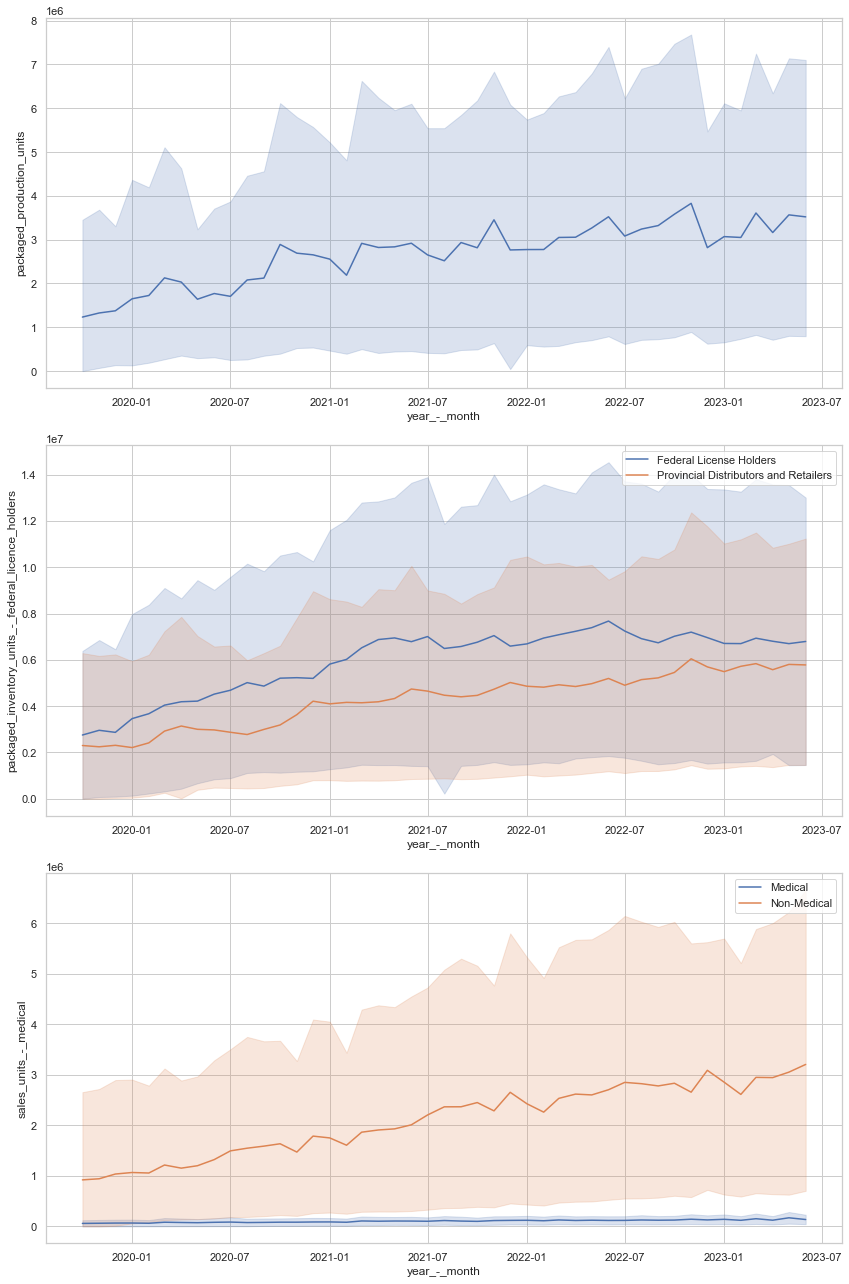

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Creating time series plots for key metrics
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))
sns.lineplot(ax=axes[0], x='year_-_month', y='packaged_production_units', data=cannabis_data)
sns.lineplot(ax=axes[1], x='year_-_month', y='packaged_inventory_units_-_federal_licence_holders', data=cannabis_data, label='Federal License Holders')
sns.lineplot(ax=axes[1], x='year_-_month', y='packaged_inventory_units_-_provincial_distributors_and_retailer', data=cannabis_data, label='Provincial Distributors and Retailers')
sns.lineplot(ax=axes[2], x='year_-_month', y='sales_units_-_medical', data=cannabis_data, label='Medical')
sns.lineplot(ax=axes[2], x='year_-_month', y='sales_units_-_non-medical', data=cannabis_data, label='Non-Medical')
plt.tight_layout()


## Product Type Analysis for Non-Medical Use
We further analyze the data to compare the growth of different product types for non-medical use.


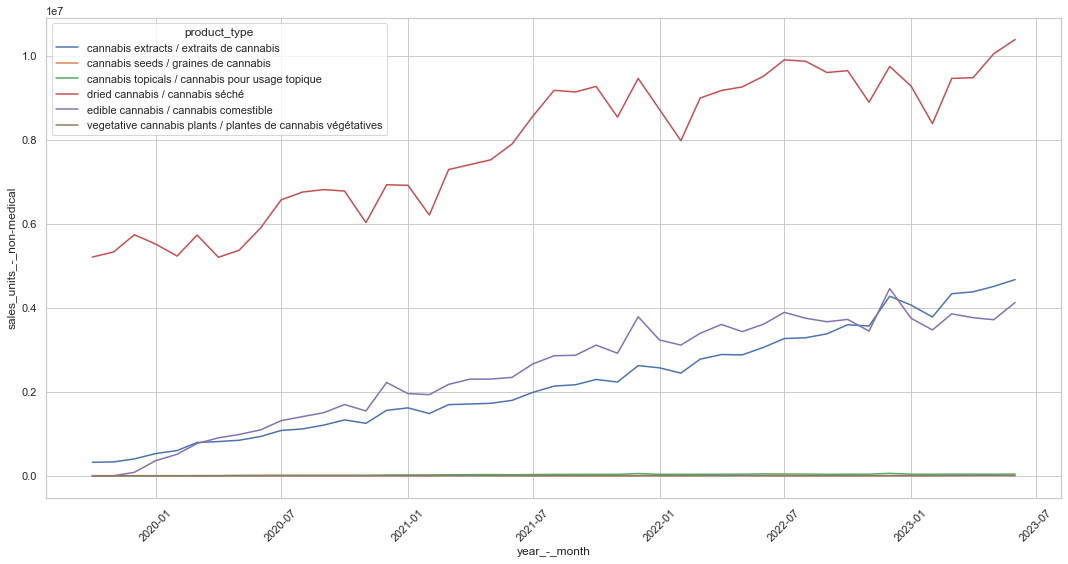

In [4]:

# Filtering and grouping data for non-medical use
non_medical_data = cannabis_data[cannabis_data['sales_units_-_non-medical'].notnull()]
grouped_data = non_medical_data.groupby(['year_-_month', 'product_type'])['sales_units_-_non-medical'].sum().reset_index()

# Visualization
plt.figure(figsize=(15, 8))
sns.lineplot(x='year_-_month', y='sales_units_-_non-medical', hue='product_type', data=grouped_data)
plt.xticks(rotation=45)
plt.tight_layout()
